In [957]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [958]:
df = pd.read_csv('/Users/ratchanonkhongsawi/Desktop/CMKL/2nd/FALL/RND1/Data/cleaned_faifa_v2.csv')
date_time = pd.to_datetime(df.pop('date_time'), format='%Y-%m-%d %H:%M:%S')
df.set_index(date_time, inplace=True)
df

,Temperature,Conductivity,TDS,Salinity,DO,Sensor_Depth,pH,Chlorophyll,Turbid
date_time,,,,,,,,,
2016-10-28 14:00:00,31.355000,271.500000,177356.666667,0.128333,3189.930000,0.0,6.993333,0.0,59.826667
2016-10-28 15:00:00,31.413333,257.000000,167906.666667,0.120000,3098.725000,0.0,7.001667,0.0,51.596667
2016-10-28 16:00:00,31.488333,264.833333,172960.000000,0.125000,2987.713333,0.0,7.015000,0.0,52.148333
2016-10-28 17:00:00,31.346667,267.666667,174698.333333,0.123333,3177.026667,0.0,7.000000,0.0,57.010000
2016-10-28 18:00:00,31.318000,265.400000,173496.000000,0.124000,3132.854000,0.0,7.006000,0.0,55.990000
...,...,...,...,...,...,...,...,...,...
2024-07-25 18:00:00,30.680000,503.333333,328.833333,0.240000,0.000000,0.0,0.000000,0.0,0.000000
2024-07-25 19:00:00,30.686667,481.833333,314.666667,0.231667,0.000000,0.0,0.000000,0.0,0.000000
2024-07-25 20:00:00,30.693417,537.333333,350.833333,0.259005,0.000000,0.0,0.000000,0.0,0.000000


In [959]:
# Convert date_time to datetime format and set as the index
df.set_index(date_time, inplace=True)

# Ensure the slice is a copy
df = df.loc['2019-01-01':].copy()

# Remove outliers in Salinity
df = df[(df['Salinity'] > 0) & (df['Salinity'] < 50)].copy()

# Drop unnecessary columns
list_to_remove = ['Conductivity', 'Temperature', 'TDS', 'DO', 'Sensor_Depth', 'pH', 'Chlorophyll', 'Turbid']
df.drop(list_to_remove, axis=1, inplace=True)

# Generate cyclical time features
timestamp_s = df.index.map(pd.Timestamp.timestamp)
day = 24 * 60 * 60
year = 365.2425 * day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


# Display the resulting DataFrame
print(df.head())

                     Salinity       Day sin   Day cos  Year sin  Year cos
date_time                                                                
2019-01-01 00:00:00  5.013333 -5.030095e-12  1.000000  0.002021  0.999998
2019-01-01 01:00:00  4.792500  2.588190e-01  0.965926  0.002738  0.999996
2019-01-01 02:00:00  4.698333  5.000000e-01  0.866025  0.003455  0.999994
2019-01-01 03:00:00  4.563333  7.071068e-01  0.707107  0.004172  0.999991
2019-01-01 04:00:00  4.558000  8.660254e-01  0.500000  0.004888  0.999988


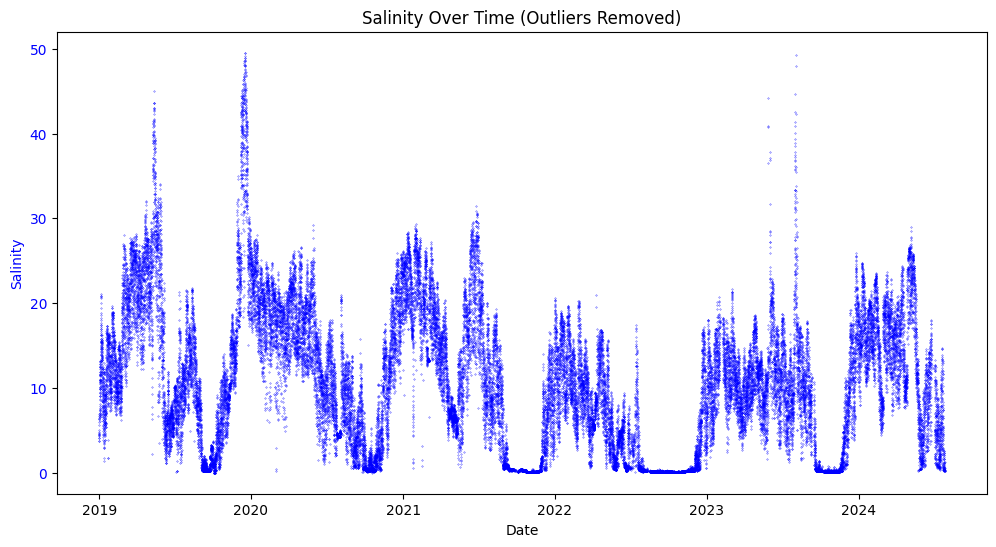

In [960]:
# Plot Salinity data
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df.index, df['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.title('Salinity Over Time (Outliers Removed)')
plt.show()

In [961]:
df.head()

,Salinity,Day sin,Day cos,Year sin,Year cos
date_time,,,,,
2019-01-01 00:00:00,5.013333,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,4.792500,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,4.698333,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,4.563333,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,4.558000,8.660254e-01,0.500000,0.004888,0.999988


Text(0.5, 1.0, 'Time of day signal')

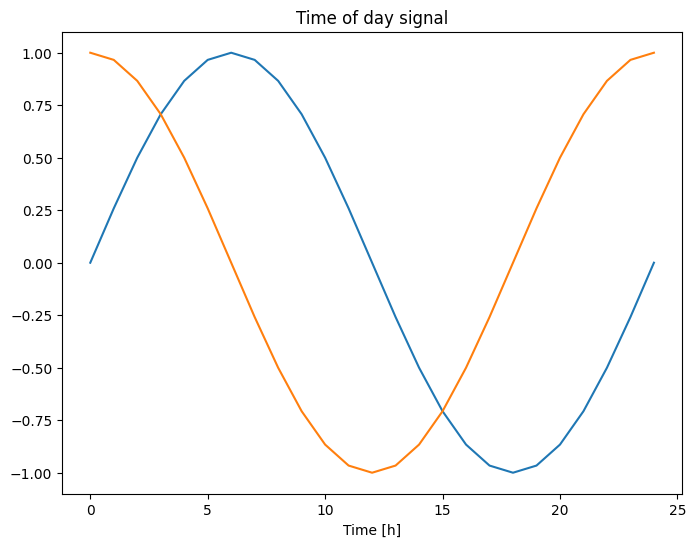

In [962]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

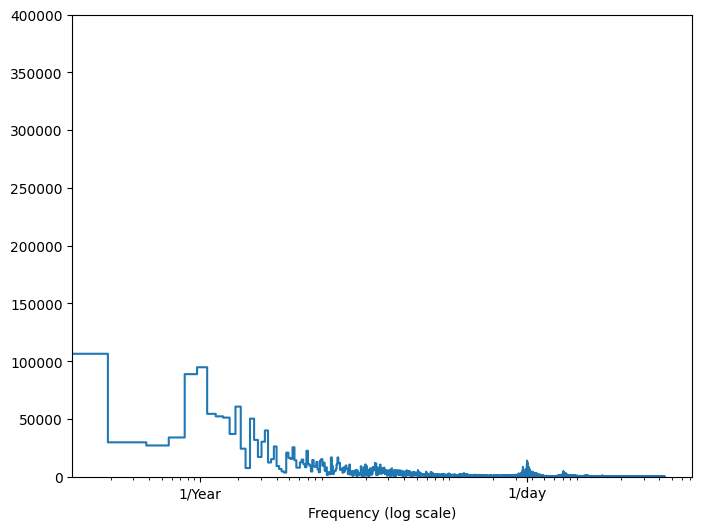

In [963]:
fft = tf.signal.rfft(df['Salinity'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Salinity'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [964]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [965]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/var/folders/g5/m8q22yr95qb29lq55z_6_d7r0000gn/T/ipykernel_29965/3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


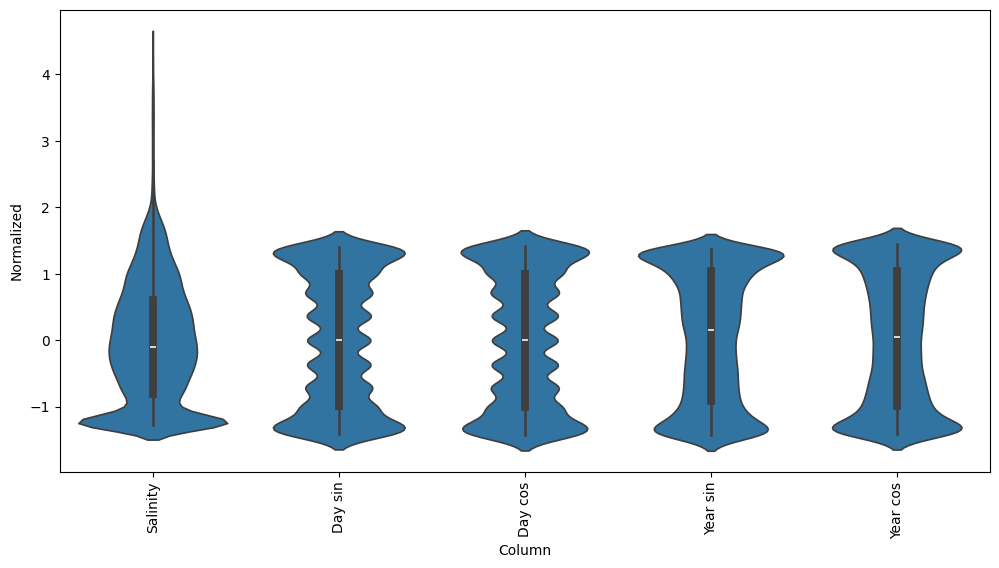

In [966]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [967]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [968]:
w2 = WindowGenerator(input_width=48, label_width=1, shift=1,
                     label_columns=['Salinity'])
w2

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['Salinity']

In [969]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [970]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 49, 5)
Inputs shape: (3, 48, 5)
Labels shape: (3, 1, 1)


In [971]:
w2.example = example_inputs, example_labels

In [972]:
def plot(self, model=None, plot_col='Salinity', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time []')

WindowGenerator.plot = plot

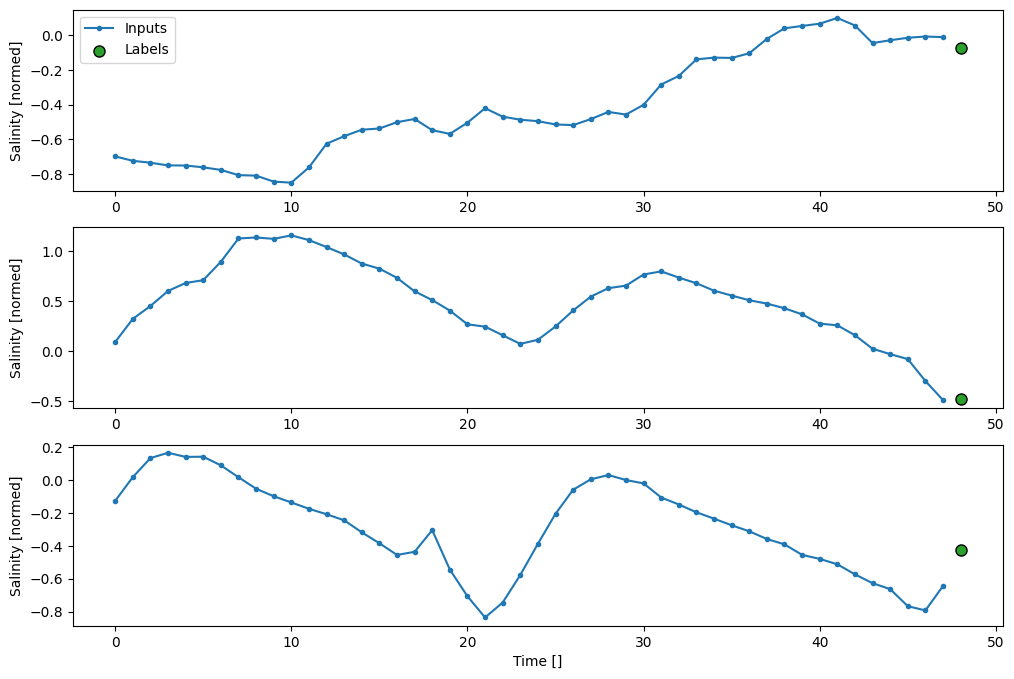

In [973]:
w2.plot()

In [974]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [975]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [976]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Salinity'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Salinity']

In [977]:
train_step_window = WindowGenerator(
    input_width=48, label_width=48, shift=1,
    label_columns=['Salinity'])
train_step_window

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['Salinity']

In [978]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [979]:
baseline = Baseline(label_index=column_indices['Salinity'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.0204 - mean_absolute_error: 0.0834


In [980]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Salinity'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Salinity']

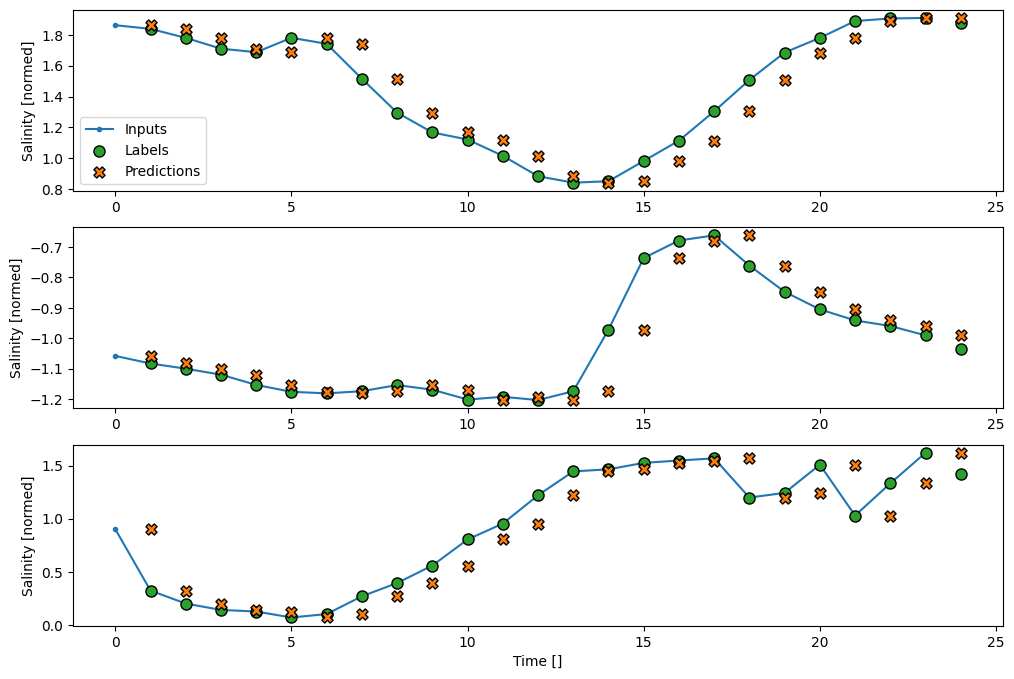

In [981]:
wide_window.plot(baseline)

In [982]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [983]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [984]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 1.9670 - mean_absolute_error: 1.0655 - val_loss: 0.3917 - val_mean_absolute_error: 0.5040
Epoch 2/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 0.2964 - mean_absolute_error: 0.4119 - val_loss: 0.0623 - val_mean_absolute_error: 0.1967
Epoch 3/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - loss: 0.0447 - mean_absolute_error: 0.1571 - val_loss: 0.0226 - val_mean_absolute_error: 0.0964
Epoch 4/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.0204 - mean_absolute_error: 0.0929 - val_loss: 0.0214 - val_mean_absolute_error: 0.0864
Epoch 5/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0200 - mean_absolute_error: 0.0881 - val_loss: 0.0214 - val_mean_absolute_error: 0.0863
Epoch 6/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 0.0200 - mean_absolute_error: 0.0880 - val_loss: 0.0214 - val_mean_absolute_error: 0.0857
Epoch 7/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 0.0200 - mean_

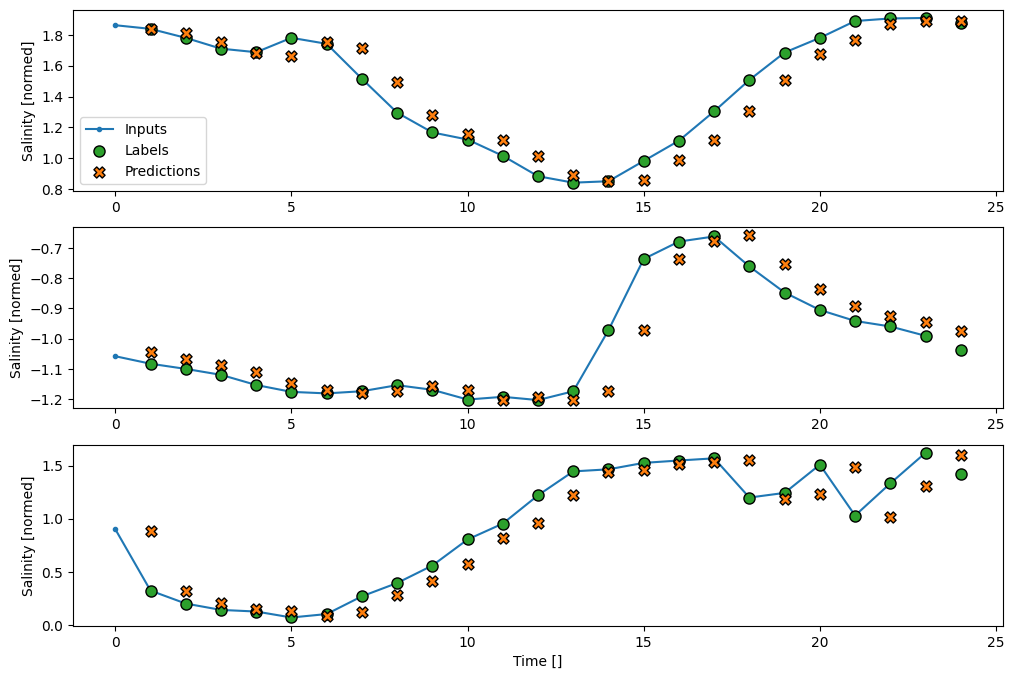

In [985]:
wide_window.plot(linear)

In [986]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 0.0943 - mean_absolute_error: 0.1659 - val_loss: 0.0199 - val_mean_absolute_error: 0.0825
Epoch 2/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.0182 - mean_absolute_error: 0.0860 - val_loss: 0.0201 - val_mean_absolute_error: 0.0835
Epoch 3/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 0.0182 - mean_absolute_error: 0.0868 - val_loss: 0.0192 - val_mean_absolute_error: 0.0806
Epoch 4/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 0.0177 - mean_absolute_error: 0.0847 - val_loss: 0.0189 - val_mean_absolute_error: 0.0787
Epoch 5/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - loss: 0.0174 - mean_absolute_error: 0.0826 - val_loss: 0.0195 - val_mean_absolute_error: 0.0818
Epoch 6/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0176 - mean_absolute_error: 0.0838 - val_loss: 0.0191 - val_mean_absolute_error: 0.0784
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.0181 - mean_absolute_erro

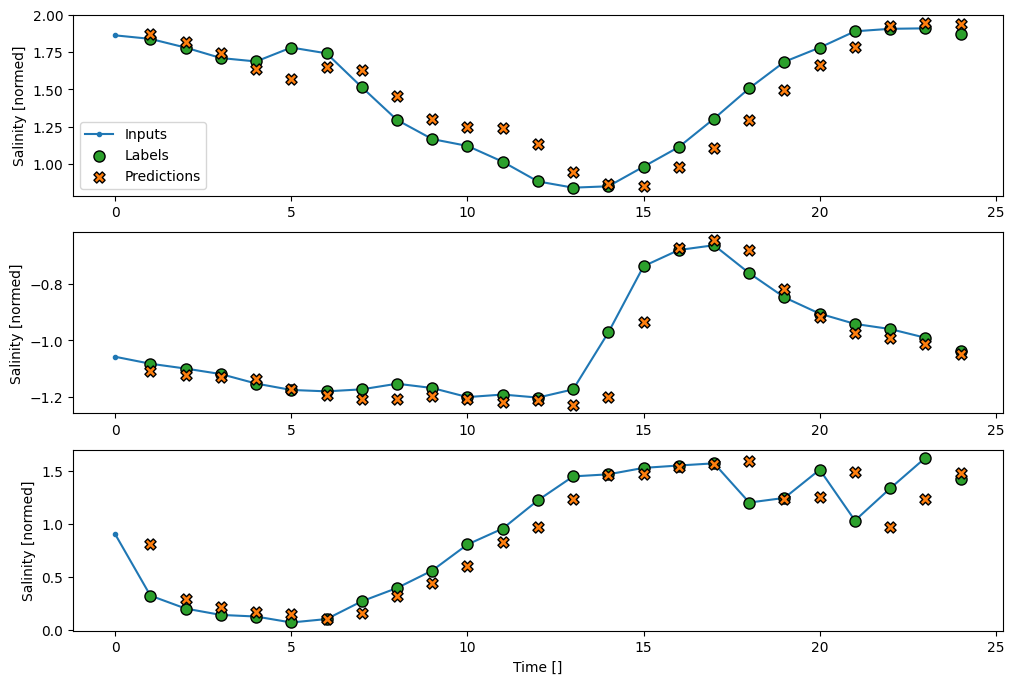

In [987]:
wide_window.plot(dense)

In [1014]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1))
])

In [1015]:
history = compile_and_fit(lstm_model, train_step_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(train_step_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(train_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.1897 - mean_absolute_error: 0.3120 - val_loss: 0.1233 - val_mean_absolute_error: 0.2286
Epoch 2/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.1227 - mean_absolute_error: 0.2459 - val_loss: 0.1153 - val_mean_absolute_error: 0.2150
Epoch 3/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.1066 - mean_absolute_error: 0.2243 - val_loss: 0.1036 - val_mean_absolute_error: 0.1993
Epoch 4/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.0983 - mean_absolute_error: 0.2130 - val_loss: 0.1045 - val_mean_absolute_error: 0.1986
Epoch 5/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.0953 - mean_absolute_error: 0.2090 - val_loss: 0.1030 - val_mean_absolute_error: 0.2005
Epoch 6/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.0914 - mean_absolute_error: 0.2030 - val_loss: 0.1041 - val_mean_absolute_error: 0.1943
Epoch 7/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.0888 - mea

In [997]:
print("Train window")
print('Input shape:', train_step_window.example[0].shape)
print('Labels shape:', train_step_window.example[1].shape)
print('Output shape:', lstm_model(train_step_window.example[0]).shape)

Train window
Input shape: (32, 48, 5)
Labels shape: (32, 1, 1)
Output shape: (32, 1)


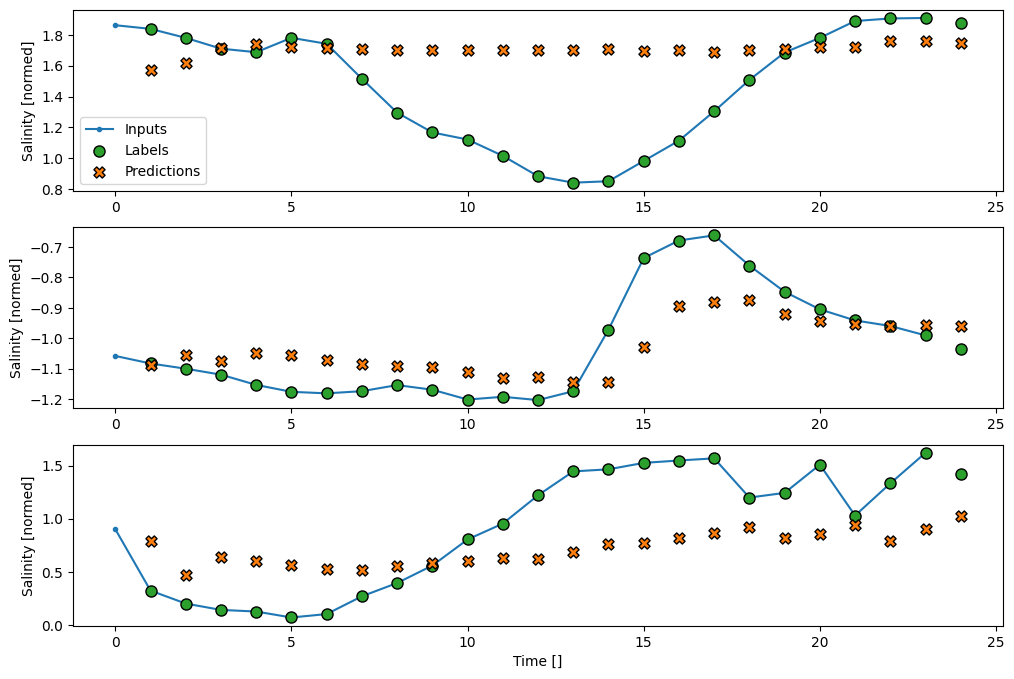

In [1009]:
wide_window.plot(lstm_model)